<a href="https://colab.research.google.com/github/HuyenTrang457/MCM/blob/main/model2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from xgboost import XGBClassifier

!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss

sử dụng bộ dữ liệu lấy từ phần Data-processing, sau đó chọn ra các cột cần

thiết là 'p1_games','point_victor','p1_ace','p1_winner','p1_unf_err' 'p1_distance_run', 'rally_count', 'speed_mph','p1_net_pt_won'.

Sau đó tách bộ dữ liệu thành 30 bộ dữ liệu nhỏ ứng với từng match_id, lưu thành file csv mới với tên trùng với match_id

In [9]:
import pandas as pd
import os

# Load the processed dataset
data_path = "/content/sample_data/Wimbledon_featured_matches_cleaned-1.csv"  # Replace with your actual processed data file path
df = pd.read_csv(data_path)
df['point_victor'] = df['point_victor'].replace(2, 0)
# Select necessary columns
columns_to_select = ['match_id', 'p1_games', 'point_victor', 'p1_ace', 'p1_winner', 'p1_unf_err',
                     'p1_distance_run', 'rally_count', 'speed_mph', 'p1_net_pt_won']
df = df[columns_to_select]

# Create a directory to save individual match files
output_dir = "match_files"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Split the dataset by match_id and save each as a separate CSV file
unique_match_ids = df['match_id'].unique()

for match_id in unique_match_ids:
    match_data = df[df['match_id'] == match_id]
    match_file_name = f"{match_id}.csv"
    match_file_path = os.path.join(output_dir, match_file_name)
    match_data.to_csv(match_file_path, index=False)

print(f"Files saved in the folder: {output_dir}")


Files saved in the folder: match_files


In [10]:
data_dir = '/content/match_files'

# Liệt kê các file trong thư mục (điều chỉnh tên file theo cấu trúc thực tế)
file_list = [
    '2023-wimbledon-1301.csv',
    '2023-wimbledon-1302.csv',
    '2023-wimbledon-1303.csv',
    '2023-wimbledon-1304.csv',
    '2023-wimbledon-1306.csv',
    '2023-wimbledon-1307.csv',
    '2023-wimbledon-1308.csv',
    '2023-wimbledon-1310.csv',
    '2023-wimbledon-1311.csv',
    '2023-wimbledon-1312.csv',
    '2023-wimbledon-1313.csv',
    '2023-wimbledon-1314.csv',
    '2023-wimbledon-1315.csv',
    '2023-wimbledon-1316.csv',
    '2023-wimbledon-1401.csv',
    '2023-wimbledon-1402.csv',
    '2023-wimbledon-1403.csv',
    '2023-wimbledon-1404.csv',
    '2023-wimbledon-1405.csv',
    '2023-wimbledon-1406.csv',
    '2023-wimbledon-1407.csv',
    '2023-wimbledon-1408.csv',
    '2023-wimbledon-1501.csv',
    '2023-wimbledon-1502.csv',
    '2023-wimbledon-1503.csv',
    '2023-wimbledon-1504.csv',
    '2023-wimbledon-1601.csv',
    '2023-wimbledon-1602.csv',
    '2023-wimbledon-1701.csv'
]



Huấn luyện mô hình xgboot

Hợp nhất dữ liệu

huấn luyện model


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


folder_path = "/content/match_files"  # Thay bằng đường dẫn thực tế

# Lấy danh sách tệp CSV
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Đọc và hợp nhất dữ liệu
data_list = []
for file in csv_files:
    data = pd.read_csv(file)
    data_list.append(data)

# Hợp nhất tất cả các tệp
full_data = pd.concat(data_list, ignore_index=True)

# Sử dụng toàn bộ cột trừ nhãn làm đặc trưng
features = full_data.columns.difference(["point_victor","match_id"])
X = full_data[features]
y = full_data["point_victor"]  # Nhãn

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = xgb_model.predict(X_test)




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sau khi huấn luyện xgboot, ,dùng nó để  Dự đoán xác suất cho tập dữ liệu match_id = 1301

Vẽ biểu đồ xác suất dự đoán

Đánh giá tập dữ liệu

Trích xuất tầm quan trọng của đặc trưng

Vẽ biểu đồ tầm quan trọng của đặc trưng

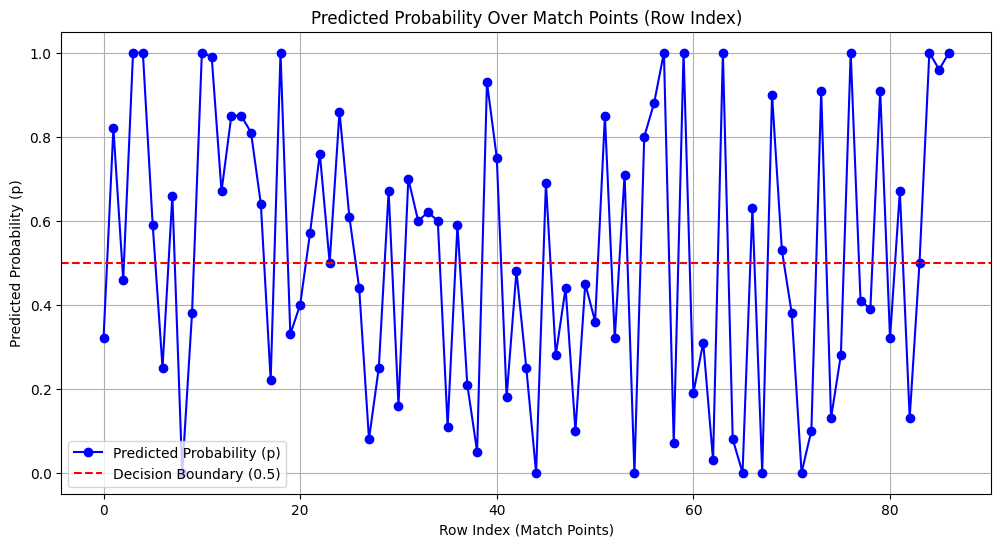


Accuracy on entire test set: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.91      0.81      0.86        48

    accuracy                           0.85        87
   macro avg       0.85      0.85      0.85        87
weighted avg       0.86      0.85      0.85        87


Tầm quan trọng của các đặc trưng:
           Feature  Importance
5        p1_winner    0.558326
4       p1_unf_err    0.263487
3    p1_net_pt_won    0.141490
6      rally_count    0.012700
1  p1_distance_run    0.009532
2         p1_games    0.007299
7        speed_mph    0.007166
0           p1_ace    0.000000


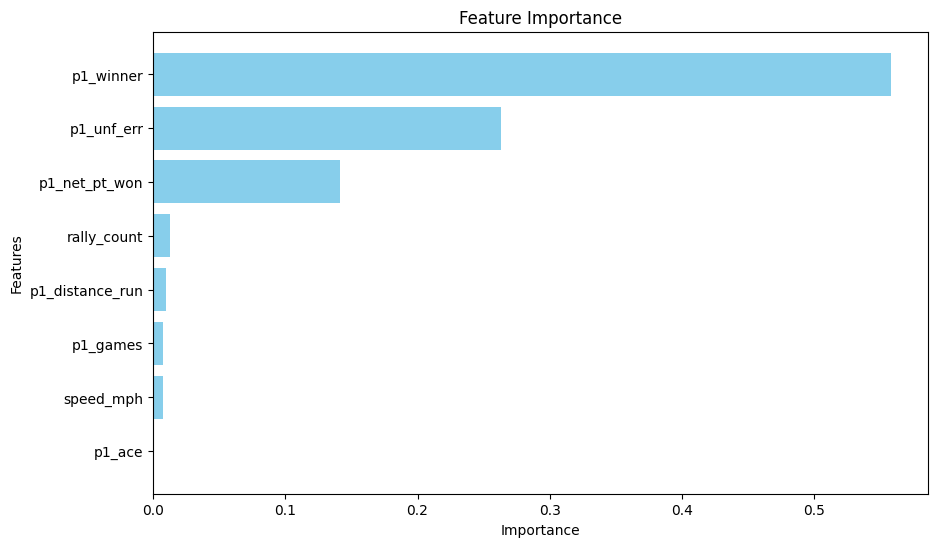

<Figure size 1000x600 with 0 Axes>

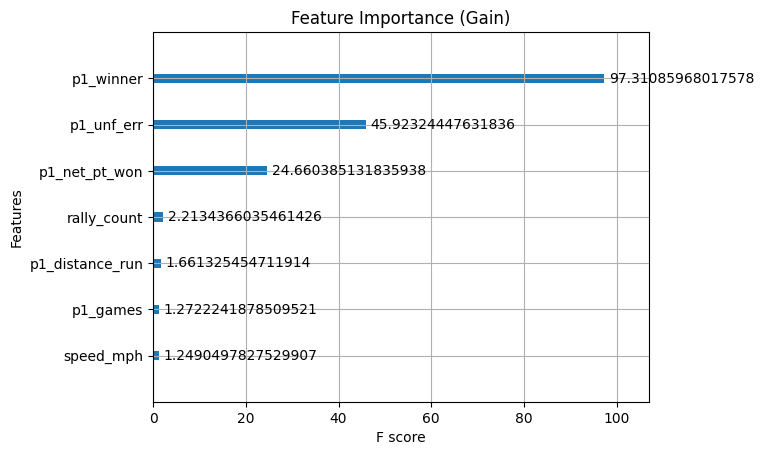

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

# Tạo thư mục lưu ảnh nếu chưa tồn tại
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Đọc dữ liệu từ file CSV (thay đổi đường dẫn nếu cần)
data = pd.read_csv("/content/match_files/2023-wimbledon-1301.csv")

# Loại bỏ các cột không cần thiết hoặc không phải đặc trưng
features = data.columns.difference(["point_victor", "match_id"])
X = data[features]  # Sử dụng tất cả các đặc trưng
y = data["point_victor"]  # Nhãn mục tiêu

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Huấn luyện mô hình XGBoost
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)

# Dự đoán xác suất cho toàn bộ tập kiểm tra
y_pred_proba_all = xgb_model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán của lớp 1

# Sử dụng chỉ số hàng dữ liệu làm trục x
data_points = range(len(y_pred_proba_all))  # Số hàng được đánh chỉ mục tuần tự

# Vẽ biểu đồ xác suất dự đoán theo từng hàng dữ liệu
plt.figure(figsize=(12, 6))
plt.plot(data_points, [round(p, 2) for p in y_pred_proba_all], label="Predicted Probability (p)", marker='o', color='b')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel("Row Index (Match Points)")
plt.ylabel("Predicted Probability (p)")
plt.title("Predicted Probability Over Match Points (Row Index)")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "predicted_probability.png"))
plt.show()

# Đánh giá toàn bộ tập dữ liệu
y_pred_all = (y_pred_proba_all > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_all)
print(f"\nAccuracy on entire test set: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_all))

# Trích xuất tầm quan trọng của đặc trưng
feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

print("\nTầm quan trọng của các đặc trưng:")
print(importance_df)

# Vẽ biểu đồ tầm quan trọng của đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.savefig(os.path.join(output_dir, "feature_importance.png"))
plt.show()

# Vẽ biểu đồ tầm quan trọng của đặc trưng (dùng XGBoost)
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type="gain", max_num_features=10)
plt.title("Feature Importance (Gain)")
plt.savefig(os.path.join(output_dir, "feature_importance_gain.png"))
plt.show()
